In [1]:
import pandas as pd

* 종속변수 데이터 불러오기

In [2]:
apt=pd.read_csv('C:/Users/tjoeun/Downloads/미니프로젝트/데이터/아파트_가격_전처리.csv')

In [3]:
apt.head(2)

,address,전용면적,price,층,건축년도,date,price_per_m2,gu,dong
0,서울특별시 강동구 길동,59.97,21100,8,2006,20070101,351.842588,강동구,길동
1,서울특별시 노원구 중계동,59.34,22000,8,1996,20070101,370.744860,노원구,중계동


In [4]:
# 동, 월별 가격 평균
apt1 = apt[['gu', 'dong', 'price_per_m2', 'date']]

In [5]:
apt1.dtypes

gu               object
dong             object
price_per_m2    float64
date              int64
dtype: object

In [6]:
apt1['date'] = pd.to_datetime(apt1['date'], format='%Y%m%d')
apt1['month'] = apt1['date'].dt.strftime('%y-%m')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_5756\1645661758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt1['date'] = pd.to_datetime(apt1['date'], format='%Y%m%d')
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_5756\1645661758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt1['month'] = apt1['date'].dt.strftime('%y-%m')


In [7]:
apt1.head(2)

,gu,dong,price_per_m2,date,month
0,강동구,길동,351.842588,2007-01-01,07-01
1,노원구,중계동,370.744860,2007-01-01,07-01


* 독립변수 데이터 불러오기

In [8]:
df = pd.read_csv('C:/Users/tjoeun/Downloads/미니프로젝트/데이터/독립변수_모음(월별).csv', encoding='euc-kr')

In [9]:
df.tail(5)

,date,주택담보대출(연%),미국달러,위안,일본엔,유로,소비자물가지수,소비자물가지수(전월 대비 증감률),KOSPI_종가,KOSDAQ_종가,무담보콜금리(1일),KORIBOR(3개월),CD(91일),국고채(1년),국고채(10년)
189,2022/10,4.82,1419.3,195.94,9.6119,1413.34,109.21,0.3,2293.61,695.33,2.959,3.52,3.69,3.602,4.267
190,2022/11,4.74,1331.5,184.64,9.5954,1374.31,109.10,-0.1,2472.53,729.54,3.096,4.02,3.99,3.838,3.915
191,2022/12,4.63,1267.3,181.44,9.5318,1351.20,109.28,0.2,2236.40,679.29,3.235,4.03,4.02,3.705,3.541
192,2023/01,4.58,1228.7,182.09,9.4222,1332.83,110.10,0.8,2425.08,740.49,3.269,3.74,3.80,3.584,3.411
193,2023/02,NaN,1317.4,188.79,9.6736,1397.76,110.38,0.3,NaN,NaN,3.425,3.54,3.52,3.528,3.450


In [10]:
df.dtypes

date                   object
주택담보대출(연%)            float64
미국달러                  float64
위안                    float64
일본엔                   float64
유로                    float64
소비자물가지수               float64
소비자물가지수(전월 대비 증감률)    float64
  KOSPI_종가            float64
  KOSDAQ_종가           float64
  무담보콜금리(1일)          float64
KORIBOR(3개월)          float64
CD(91일)               float64
국고채(1년)               float64
국고채(10년)              float64
dtype: object

In [11]:
df['date'] = df['date'].str.replace('/', '')
df['date'] = pd.to_datetime(df['date'], format='%Y%m')
df['month'] = df['date'].dt.strftime('%y-%m')

* apt1 & df 합치기 (month 기준)

In [12]:
total = pd.merge(apt1, df, on='month')
total = total.drop('date_x', axis=1)
total = total.drop('date_y', axis=1)


In [13]:
total.tail(10)

,gu,dong,price_per_m2,month,주택담보대출(연%),미국달러,위안,일본엔,유로,소비자물가지수,소비자물가지수(전월 대비 증감률),KOSPI_종가,KOSDAQ_종가,무담보콜금리(1일),KORIBOR(3개월),CD(91일),국고채(1년),국고채(10년)
1048565,은평구,증산동,659.366537,20-11,2.56,1104.4,168.02,10.6157,1321.58,100.09,-0.1,2591.34,886.11,0.49,0.65,0.66,0.7,1.61
1048566,성동구,하왕십리동,1118.041662,20-11,2.56,1104.4,168.02,10.6157,1321.58,100.09,-0.1,2591.34,886.11,0.49,0.65,0.66,0.7,1.61
1048567,강남구,개포동,2787.805856,20-11,2.56,1104.4,168.02,10.6157,1321.58,100.09,-0.1,2591.34,886.11,0.49,0.65,0.66,0.7,1.61
1048568,마포구,신공덕동,1450.176093,20-11,2.56,1104.4,168.02,10.6157,1321.58,100.09,-0.1,2591.34,886.11,0.49,0.65,0.66,0.7,1.61
1048569,강서구,내발산동,879.782711,20-11,2.56,1104.4,168.02,10.6157,1321.58,100.09,-0.1,2591.34,886.11,0.49,0.65,0.66,0.7,1.61
1048570,구로구,구로동,360.144058,20-11,2.56,1104.4,168.02,10.6157,1321.58,100.09,-0.1,2591.34,886.11,0.49,0.65,0.66,0.7,1.61
1048571,은평구,신사동,705.801343,20-11,2.56,1104.4,168.02,10.6157,1321.58,100.09,-0.1,2591.34,886.11,0.49,0.65,0.66,0.7,1.61
1048572,노원구,하계동,977.666792,20-11,2.56,1104.4,168.02,10.6157,1321.58,100.09,-0.1,2591.34,886.11,0.49,0.65,0.66,0.7,1.61
1048573,성북구,종암동,399.680256,20-11,2.56,1104.4,168.02,10.6157,1321.58,100.09,-0.1,2591.34,886.11,0.49,0.65,0.66,0.7,1.61
1048574,동대문구,장안동,654.964632,20-11,2.56,1104.4,168.02,10.6157,1321.58,100.09,-0.1,2591.34,886.11,0.49,0.65,0.66,0.7,1.61


In [14]:
total.isnull().sum()

gu                         0
dong                       0
price_per_m2               0
month                      0
주택담보대출(연%)                 0
미국달러                       0
위안                    604156
일본엔                        0
유로                         0
소비자물가지수                    0
소비자물가지수(전월 대비 증감률)         0
  KOSPI_종가                 0
  KOSDAQ_종가                0
  무담보콜금리(1일)               0
KORIBOR(3개월)               0
CD(91일)                    0
국고채(1년)                    0
국고채(10년)                   0
dtype: int64

In [15]:
total = total.rename(columns={'주택담보대출(연%)':'loan',
                              '미국달러':'dollar',
                              '소비자물가지수':'cpi'})

* 분석

In [ ]:
total1 = total.loc[total['dong'] == '개포동']

In [32]:
total

,gu,dong,price_per_m2,month,loan,dollar,위안,일본엔,유로,cpi,소비자물가지수(전월 대비 증감률),KOSPI_종가,KOSDAQ_종가,무담보콜금리(1일),KORIBOR(3개월),CD(91일),국고채(1년),국고채(10년)
0,강동구,길동,351.842588,07-01,6.11,940.9,NaN,7.7310,1220.07,76.496,0.2,1360.23,576.37,4.63,4.91,4.92,4.98,5.04
1,노원구,중계동,370.744860,07-01,6.11,940.9,NaN,7.7310,1220.07,76.496,0.2,1360.23,576.37,4.63,4.91,4.92,4.98,5.04
2,성북구,정릉동,370.631839,07-01,6.11,940.9,NaN,7.7310,1220.07,76.496,0.2,1360.23,576.37,4.63,4.91,4.92,4.98,5.04
3,노원구,월계동,263.596930,07-01,6.11,940.9,NaN,7.7310,1220.07,76.496,0.2,1360.23,576.37,4.63,4.91,4.92,4.98,5.04
4,강동구,길동,331.086674,07-01,6.11,940.9,NaN,7.7310,1220.07,76.496,0.2,1360.23,576.37,4.63,4.91,4.92,4.98,5.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,구로구,구로동,360.144058,20-11,2.56,1104.4,168.02,10.6157,1321.58,100.090,-0.1,2591.34,886.11,0.49,0.65,0.66,0.70,1.61
1048571,은평구,신사동,705.801343,20-11,2.56,1104.4,168.02,10.6157,1321.58,100.090,-0.1,2591.34,886.11,0.49,0.65,0.66,0.70,1.61
1048572,노원구,하계동,977.666792,20-11,2.56,1104.4,168.02,10.6157,1321.58,100.090,-0.1,2591.34,886.11,0.49,0.65,0.66,0.70,1.61
1048573,성북구,종암동,399.680256,20-11,2.56,1104.4,168.02,10.6157,1321.58,100.090,-0.1,2591.34,886.11,0.49,0.65,0.66,0.70,1.61


In [19]:
# 연속형 데이터 아닌 컬럼 삭제
total1 = total1.drop('gu', axis=1)
total1 = total1.drop('dong', axis=1)
total1 = total1.drop('month', axis=1)
total1 = total1.drop('위안', axis=1)

In [20]:
total1.shape

(11681, 14)

In [33]:
X=total[['loan','cpi','dollar']]
y=total['price_per_m2']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.791
Model:                            OLS   Adj. R-squared (uncentered):              0.791
Method:                 Least Squares   F-statistic:                          1.320e+06
Date:                Mon, 20 Mar 2023   Prob (F-statistic):                        0.00
Time:                        14:33:33   Log-Likelihood:                     -7.6667e+06
No. Observations:             1048575   AIC:                                  1.533e+07
Df Residuals:                 1048572   BIC:                                  1.533e+07
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
loan         -55.3852      0.260   -213.296      0.000     -55.894     -54.876
cpi            5.7014      0.046    124.638      0.000       5.612       5.791
dollar         0.3396      0.004     82.258      0.000       0.332       0.348
==============================================================================
Omnibus:                   531764.882   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4468113.423
Skew:                           2.301   Prob(JB):                         0.00
Kurtosis:                      12.005   Cond. No.                         829.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
X=total1[['loan','cpi','dollar']]
y=total1['price_per_m2']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                          2.752e+04
Date:                Mon, 20 Mar 2023   Prob (F-statistic):                        0.00
Time:                        13:16:20   Log-Likelihood:                         -91836.
No. Observations:               11681   AIC:                                  1.837e+05
Df Residuals:                   11678   BIC:                                  1.837e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
loan         -85.0779      4.788    -17.769      0.000     -94.463     -75.692
cpi           16.3933      0.618     26.545      0.000      15.183      17.604
dollar         0.4406      0.058      7.597      0.000       0.327       0.554
==============================================================================
Omnibus:                     3074.162   Durbin-Watson:                   1.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10981.811
Skew:                           1.295   Prob(JB):                         0.00
Kurtosis:                       6.981   Cond. No.                         942.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='price_per_m2'>

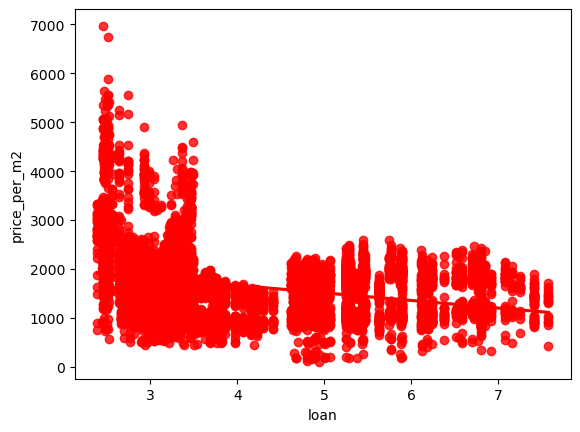

In [26]:
#회귀모형그래프
import seaborn as sns
import matplotlib.pyplot as plt

#독립변수1와 종속변수(상관관계) --> 독립변수별로 하나씩 만들기
sns.regplot('loan','price_per_m2', total1, color='red')

<AxesSubplot:xlabel='cpi', ylabel='price_per_m2'>

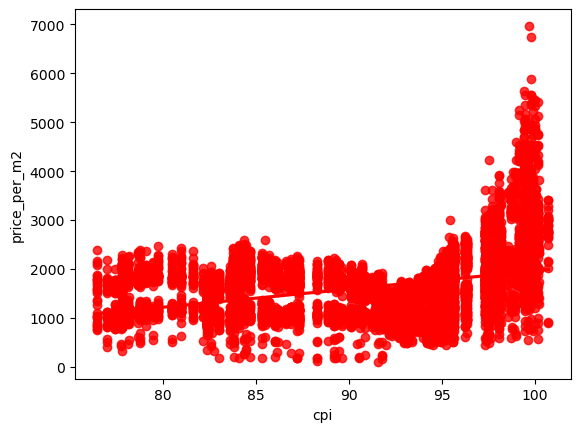

In [27]:
sns.regplot('cpi','price_per_m2', total1, color='red')

<AxesSubplot:xlabel='dollar', ylabel='price_per_m2'>

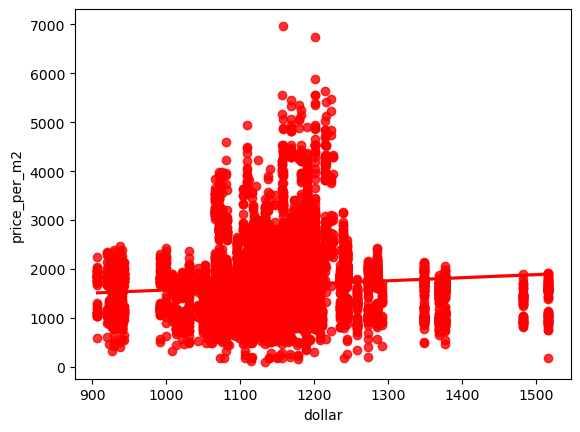

In [28]:
sns.regplot('dollar','price_per_m2', total1, color='red')

* 전체 데이터 학습용으로 할 때

In [ ]:
#학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = df[['독립변수1', '독립변수2', '독립변수3']]      #2차원 배열로 넣기
y = df['종속변수']
model.fit(X, y)

In [ ]:
#예측값 확인
#독립변수1 80, 독립변수2 1, 독립변수3 20일 때의 종속변수
독립변수1 = 80
독립변수2 = 1
독립변수3 = 20

priceA = [독립변수1, 독립변수2, 독립변수3]
종속변수 = model.predict([priceA])
종속변수

* 학습용 : 검증용 나눠서 학습할 때

In [22]:
# 스케일링
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(total1)
scaled_df = scaler.transform(total1)

In [35]:
#데이터셋을 나눔(학습용:검증용 = 7:3)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = LinearRegression().fit(X_train, y_train)

In [38]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
# 평균제곱근오차 : 예측값과 실제값을 뺀 후 제곱한 값들을 다 더하고 n으로 나눈 값의 제곱근(평균제곱오차의 제곱근)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

NameError: name 'np' is not defined

In [36]:
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.1239999625706596
검증용: 0.12274338595033263


In [ ]:
# 예측 그래프 ????
pred = model.predict(df.data)
plt.scatter(df.target, pred)
plt.xlabel("실제 주택 가격")
plt.ylabel("예측 주택 가격")
plt.title("주택 가격 예측 비교")
plt.show()

* 독립변수 확인 후 제거 (1 다중공선성)

In [ ]:
dfX = pd.DataFrame(df.data, columns=df.feature_names)
#변수들의 상관관계
dfX.corr()

In [ ]:
#독립변수들간의 상관관계 그래프
sns.pairplot(dfX)
plt.show()

In [ ]:
#다중공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["변수"] = dfX.columns
vif = vif.sort_values("VIF").reset_index(drop=True)
vif

###### 1-1 제거

In [ ]:
# 독립변수1 필드 제거 --> 유의하지않은 변수들 순서대로 하나씩 반복
arr=df.data[:,[0,1,3,4,5,6,7,8,9,10,11,12]]
arr
dfX = pd.DataFrame(arr, columns=['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
dfy = pd.DataFrame(df.target, columns=["MEDV"])
model_df = sm.OLS(dfy, dfX)
result_df = model_df.fit()
print("회귀계수\n",result_df.params)
print("R-squared\n",result_df.rsquared)
print("P values\n",result_df.pvalues)
#요약 결과 출력
print(result_df.summary())
# R-squeared 값 비교 후 뺄지 결정

###### 1-2 제거

In [ ]:
# VIF와 pvalue가 높은 GNPDEFL,POP,YEAR 변수들을 제거하고 스케일링 처리한 모형
def get_model2(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ scale(GNP) + scale(ARMED) + scale(UNEMP)", data=df_train)
    return df_train, df_test, model.fit()
df_train, df_test, result2 = get_model2(3)
print(result2.summary())
# 성능이 향상됨

In [ ]:
# Total Sum of Square(종속변수 y의 분산)
# Residual Sum of Square(잔차의 분산, 오차의 크기)
def calc_r2(df_test, result):
    target = df.loc[df_test.index].TOTEMP #실제값
    predict_test = result.predict(df_test) #예측값
    RSS = ((predict_test - target)**2).sum() #잔차의 분산
    TSS = ((target - target.mean())**2).sum() #실제값의 분산
    return 1 - RSS / TSS #결정계수

In [ ]:
# 테스트
test2 = []
for i in range(10):
    df_train, df_test, result = get_model2(i)
    test2.append(calc_r2(df_test, result))
test2
#모형의 정확도가 개선됨, 과적합이 해소됨

In [ ]:
#다중공선성 제거 전
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(test1, 'ro', label="Test")
plt.hlines(result1.rsquared, 0, 9, label="Train")
plt.legend()
plt.xlabel("seed")
plt.ylabel("R-squared")
plt.ylim(0.5, 1.2)

#다중공선성 제거 후
plt.subplot(122)
plt.plot(test2, 'ro', label="Test")
plt.hlines(result2.rsquared, 0, 9, label="Train")
plt.legend()
plt.xlabel("seed")
plt.ylabel("R-squared")
plt.ylim(0.5, 1.2)

plt.tight_layout()
plt.show()